In [38]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import os
from sklearn.linear_model import LinearRegression
from pathlib import Path
from datetime import datetime

In [39]:
def read_SMARD_Generation_data(path):
    df = pd.read_csv(path,delimiter= ';', thousands='.', decimal=',', dayfirst ="True") #, parse_dates=[[0,1]]

    #Herauslöschen der Spalte Datum bis, da diese keine zusätzlichen Informationen bietet
    df.drop(columns=["Datum bis"], inplace=True)

    
    
    #Umbenennung der Spalten
    df.rename(columns={
        "Datum von":"Datum",
        "Biomasse [MWh] Originalauflösungen":"Biomasse",
        "Wasserkraft [MWh] Originalauflösungen":"Wasserkraft",
        "Wind Offshore [MWh] Originalauflösungen":"Wind Offshore",
        "Wind Onshore [MWh] Originalauflösungen":"Wind Onshore",
        "Photovoltaik [MWh] Originalauflösungen":"Photovoltaik",
        "Sonstige Erneuerbare [MWh] Originalauflösungen":"Sonstige Erneuerbare",
        "Kernenergie [MWh] Originalauflösungen":"Kernenergie",
        "Braunkohle [MWh] Originalauflösungen":"Braunkohle",
        "Steinkohle [MWh] Originalauflösungen":"Steinkohle",
        "Erdgas [MWh] Originalauflösungen":"Erdgas",
        "Pumpspeicher [MWh] Originalauflösungen":"Pumpspeicher",
        "Sonstige Konventionelle [MWh] Originalauflösungen":"Sonstige Konventionelle"    
    }, inplace = True)

    df.drop(columns = ["Biomasse"], inplace = True)
    df.drop(columns = ["Wasserkraft"], inplace = True)
    df.drop(columns = ["Sonstige Erneuerbare"], inplace = True)
    df.drop(columns = ["Kernenergie"], inplace = True)
    df.drop(columns = ["Braunkohle"], inplace = True)
    df.drop(columns = ["Steinkohle"], inplace = True)
    df.drop(columns = ["Erdgas"], inplace = True)
    df.drop(columns = ["Pumpspeicher"], inplace = True)
    df.drop(columns = ["Sonstige Konventionelle"], inplace = True)


    #Formatierung der Datumstpalte
    df['Datum'] = pd.to_datetime(df['Datum'], format= '%d.%m.%Y %H:%M')
    #addTimeInformation(df)

    df = df[~((df['Datum'].dt.month == 2) & (df['Datum'].dt.day == 29))].sort_values(by="Datum") #Entfernen von Schaltjahren

    return df


def read_SMARD_Installed_data(path):
    df = pd.read_csv(path,delimiter= ';', thousands='.', decimal=',', dayfirst ="True") #, parse_dates=[[0,1]]

    #Herauslöschen der Spalte Datum bis, da diese keine zusätzlichen Informationen bietet
    df.drop(columns=["Datum bis"], inplace=True)

    
    
    #Umbenennung der Spalten
    df.rename(columns={
        "Datum von":"Datum",
        "Biomasse [MW] Originalauflösungen":"Biomasse",
        "Wasserkraft [MW] Originalauflösungen":"Wasserkraft",
        "Wind Offshore [MW] Originalauflösungen":"Wind Offshore",
        "Wind Onshore [MW] Originalauflösungen":"Wind Onshore",
        "Photovoltaik [MW] Originalauflösungen":"Photovoltaik",
        "Sonstige Erneuerbare [MW] Originalauflösungen":"Sonstige Erneuerbare",
        "Kernenergie [MW] Originalauflösungen":"Kernenergie",
        "Braunkohle [MW] Originalauflösungen":"Braunkohle",
        "Steinkohle [MW] Originalauflösungen":"Steinkohle",
        "Erdgas [MW] Originalauflösungen":"Erdgas",
        "Pumpspeicher [MW] Originalauflösungen":"Pumpspeicher",
        "Sonstige Konventionelle [MW] Originalauflösungen":"Sonstige Konventionelle"    
    }, inplace = True)

    #Herauslöschen der Spalten, die nicht benötigt werden
    df.drop(columns = ["Biomasse"], inplace = True)
    df.drop(columns = ["Wasserkraft"], inplace = True)
    df.drop(columns = ["Sonstige Erneuerbare"], inplace = True)
    df.drop(columns = ["Kernenergie"], inplace = True)
    df.drop(columns = ["Braunkohle"], inplace = True)
    df.drop(columns = ["Steinkohle"], inplace = True)
    df.drop(columns = ["Erdgas"], inplace = True)
    df.drop(columns = ["Pumpspeicher"], inplace = True)
    df.drop(columns = ["Sonstige Konventionelle"], inplace = True)


    #Formatierung der Datumstpalte
    df['Datum'] = pd.to_datetime(df['Datum'], format= '%d.%m.%Y', errors = 'coerce') #%H:%M')

    if df['Datum'].isnull().any():  #Falls Datumswerte nicht geparst werden konnten, wird eine Warnung ausgegeben
            print("Warnung: Einige Datumswerte konnten nicht geparst werden und wurden auf NaT gesetzt.")
    #addTimeInformation(df)

    
    return df

In [40]:
def getData(data_path, datatype):
    dataFrames = {} # Dictionary für die df für jedes Jahr
    path_var = "SMARD-Datein\\" #Pfad auf den Ordner, um später durch die Datein zu navigieren
    #project_root = Path(__file__).resolve().parent.parent
    #csv_folder = project_root/ "CSV"

    #Schleife für die Jahre 2015-2023 und Einlesen der Datei
    for year in range(2015,2024): # hier könnte man später sich die Jahre auch vom User geben lassen, welche Jahre er gerne eingelesen haben möchte
        #Dateipfad für das entsprechende Jahr
        file_path = os.path.join(path_var,data_path.format(year = year, next_year = year +1))
        
        if os.path.exists(file_path):   #Falls dieser zusammengesetze Pfad existiert,...
            if datatype == "Generation": # und der Datentyp Generation ist,...
                dataFrames[year] = read_SMARD_Generation_data(file_path)
            elif datatype == "Installed": # und der Datentyp Installed ist,...
                dataFrames[year] = read_SMARD_Installed_data(file_path)   #... soll dieser eingelesen werden
            print(f"Data for {year} loaded succsessfully.")
        else:
            print(f"File for {year} not found at path: {file_path}") #... anstonsten nicht

    
    return dataFrames   #Rückgabe der eingelesenen Date als DataFrame

In [41]:
def performance_factors(directoryGeneration,directoryInstalled):
    directory_performance_factors = {}

    for year in range(2015,2024):
        #Faktoren für die Performance errechnen
        PV_factor = directoryInstalled[year]["Photovoltaik"].iloc[0]*0.25
        OnShore_factor = directoryInstalled[year]["Wind Onshore"].iloc[0] * 0.25
        OffShore_factor = directoryInstalled[year]["Wind Offshore"].iloc[0] * 0.25

        #Anlegung eines leeren DataFrames für die Performance Faktoren pro Viertelstunde
        performance_factors = pd.DataFrame(columns=["Datum","Photovoltaik", "Wind Onshore", "Wind Offshore"])

        #Befüllen des DataFrames mit den errechneten Performance
        performance_factors["Datum"] = directoryGeneration[year]["Datum"]
        performance_factors["Photovoltaik"] = directoryGeneration[year]["Photovoltaik"] / PV_factor
        performance_factors["Wind Onshore"] = directoryGeneration[year]["Wind Onshore"] / OnShore_factor
        performance_factors["Wind Offshore"] = directoryGeneration[year]["Wind Offshore"] / OffShore_factor

        #Hinzufügen des DataFrames für das entsprechende Jahr zum Directory
        directory_performance_factors[year] = performance_factors

    return directory_performance_factors


       

In [42]:
def determinePerformanceSzenatios(directory_performance):   #Funktion zur Ermittlung der verschiedenen Szenarien
    directory_szenarios = {}    #Dictionary für die verschiedenen Szenarien (Dort sind die DataFrames für die Szenarien hinterlegt)
    meanPerformanceFactors=pd.DataFrame(columns=["Jahr","Photovoltaik","Wind Onshore","Wind Offshore"]) #Leeres DataFrame für die mittleren Performance Faktoren
    #Schleife für die Jahre 2015-2023, die die mittleren Performance Faktoren für die Szenarien berechnet
    for year in range(2015,2024):
        meanPV=directory_performance[year]["Photovoltaik"].mean()
        meanOnshore=directory_performance[year]["Wind Onshore"].mean()
        meanOffshore=directory_performance[year]["Wind Offshore"].mean()
        meanPerformanceFactors = pd.concat([meanPerformanceFactors, pd.DataFrame([{"Jahr": year, "Photovoltaik": meanPV, "Wind Onshore": meanOnshore, "Wind Offshore": meanOffshore}])], ignore_index=True)

    #Ermittlung des besten, schlechtesten Jahr pro Technologie
    bestPV = meanPerformanceFactors.loc[meanPerformanceFactors["Photovoltaik"].idxmax()]
    worstPV = meanPerformanceFactors.loc[meanPerformanceFactors["Photovoltaik"].idxmin()]

    bestOnshore = meanPerformanceFactors.loc[meanPerformanceFactors["Wind Onshore"].idxmax()]
    worstOnshore = meanPerformanceFactors.loc[meanPerformanceFactors["Wind Onshore"].idxmin()]

    bestOffshore = meanPerformanceFactors.loc[meanPerformanceFactors["Wind Offshore"].idxmax()]
    worstOffshore = meanPerformanceFactors.loc[meanPerformanceFactors["Wind Offshore"].idxmin()]

    

    bestCase = pd.concat([directory_performance[bestPV["Jahr"]]["Photovoltaik"], directory_performance[bestOnshore["Jahr"]]["Wind Onshore"], directory_performance[bestOffshore["Jahr"]]["Wind Offshore"]], axis=1)
    worstCase = pd.concat([directory_performance[worstPV["Jahr"]]["Photovoltaik"], directory_performance[worstOnshore["Jahr"]]["Wind Onshore"], directory_performance[worstOffshore["Jahr"]]["Wind Offshore"]], axis=1)

    directory_szenarios["BestCase"] = bestCase
    directory_szenarios["WorstCase"] = worstCase

    return directory_szenarios
    

    


    

    



In [43]:
data_path_generation = "Realisierte_Erzeugung_{year}01010000_{next_year}01010000_Viertelstunde.csv"
data_path_installed = "Installierte_Erzeugungsleistung_{year}01010000_{next_year}01010000_Jahr.csv"
#directory_yearly_generation = getData(data_path_generation)
directory_yearly_installed = getData(data_path_installed, "Installed")
directory_yearly_generation = getData(data_path_generation, "Generation")
directory_performance_factors = performance_factors(directory_yearly_generation,directory_yearly_installed)
#print(directory_yearly_generation[2015].head())
#print(directory_yearly_installed[2015].head())
directory_Szenario = determinePerformanceSzenatios(directory_performance_factors)
directory_Szenario["WorstCase"].to_csv("WorstCase.csv")
print(directory_Szenario["WorstCase"])

Warnung: Einige Datumswerte konnten nicht geparst werden und wurden auf NaT gesetzt.
Data for 2015 loaded succsessfully.
Warnung: Einige Datumswerte konnten nicht geparst werden und wurden auf NaT gesetzt.
Data for 2016 loaded succsessfully.
Warnung: Einige Datumswerte konnten nicht geparst werden und wurden auf NaT gesetzt.
Data for 2017 loaded succsessfully.
Warnung: Einige Datumswerte konnten nicht geparst werden und wurden auf NaT gesetzt.
Data for 2018 loaded succsessfully.
Warnung: Einige Datumswerte konnten nicht geparst werden und wurden auf NaT gesetzt.
Data for 2019 loaded succsessfully.
Warnung: Einige Datumswerte konnten nicht geparst werden und wurden auf NaT gesetzt.
Data for 2020 loaded succsessfully.
Warnung: Einige Datumswerte konnten nicht geparst werden und wurden auf NaT gesetzt.
Data for 2021 loaded succsessfully.
Warnung: Einige Datumswerte konnten nicht geparst werden und wurden auf NaT gesetzt.
Data for 2022 loaded succsessfully.
Warnung: Einige Datumswerte konn

C:\Users\jmend\AppData\Local\Temp\ipykernel_16288\2052678387.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  meanPerformanceFactors = pd.concat([meanPerformanceFactors, pd.DataFrame([{"Jahr": year, "Photovoltaik": meanPV, "Wind Onshore": meanOnshore, "Wind Offshore": meanOffshore}])], ignore_index=True)


       Photovoltaik  Wind Onshore  Wind Offshore
0               0.0      0.163064       0.336696
1               0.0      0.157914       0.365851
2               0.0      0.153687       0.402017
3               0.0      0.151720       0.400787
4               0.0      0.151841       0.386517
...             ...           ...            ...
35131           NaN      0.279975            NaN
35132           NaN      0.280655            NaN
35133           NaN      0.282914            NaN
35134           NaN      0.284954            NaN
35135           NaN      0.287286            NaN

[35136 rows x 3 columns]


In [44]:


# Daten für die Jahre 2015-2023 extrahieren
years = np.array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]).reshape(-1, 1)
installed_capacity_pv = np.array([directory_yearly_installed[year]["Photovoltaik"].iloc[0] for year in years.flatten()])
installed_capacity_onshore = np.array([directory_yearly_installed[year]["Wind Onshore"].iloc[0] for year in years.flatten()])
installed_capacity_offshore = np.array([directory_yearly_installed[year]["Wind Offshore"].iloc[0] for year in years.flatten()])

# Lineare Regression Modelle erstellen
model_pv = LinearRegression().fit(years, installed_capacity_pv)
model_onshore = LinearRegression().fit(years, installed_capacity_onshore)
model_offshore = LinearRegression().fit(years, installed_capacity_offshore)

# Jahre bis 2030
future_years = np.array(range(2024, 2031)).reshape(-1, 1)

# Vorhersagen für die zukünftigen Jahre
predicted_pv = model_pv.predict(future_years)
predicted_onshore = model_onshore.predict(future_years)
predicted_offshore = model_offshore.predict(future_years)

# Ergebnisse anzeigen
predicted_data = pd.DataFrame({
    "Jahr": future_years.flatten(),
    "Photovoltaik": predicted_pv,
    "Wind Onshore": predicted_onshore,
    "Wind Offshore": predicted_offshore
})

print(predicted_data)

   Jahr  Photovoltaik  Wind Onshore  Wind Offshore
0  2024  62327.444444  61616.527778    9987.916667
1  2025  65401.711111  63923.944444   10851.166667
2  2026  68475.977778  66231.361111   11714.416667
3  2027  71550.244444  68538.777778   12577.666667
4  2028  74624.511111  70846.194444   13440.916667
5  2029  77698.777778  73153.611111   14304.166667
6  2030  80773.044444  75461.027778   15167.416667


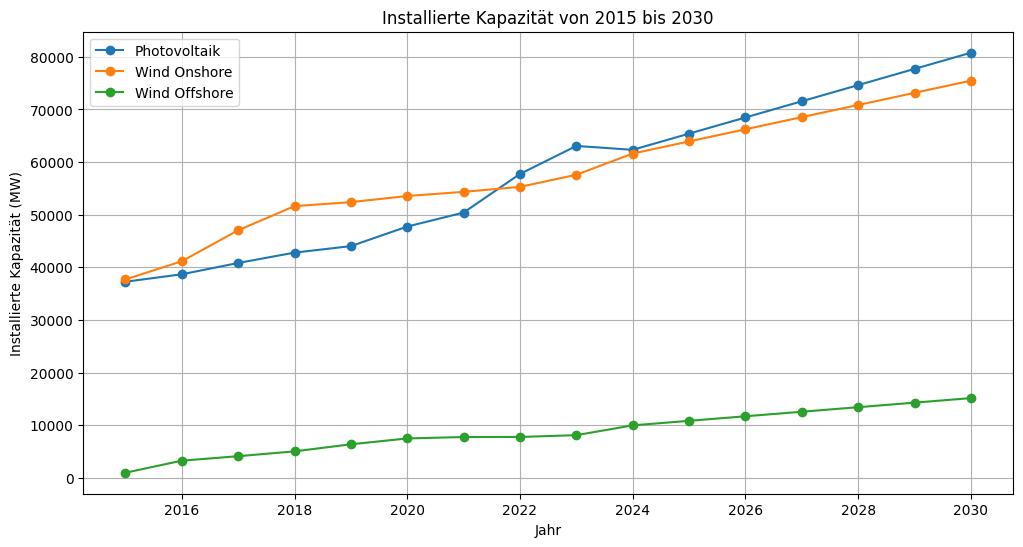

In [45]:
# Kombinieren der historischen und vorhergesagten Daten
historical_years = years.flatten()
historical_pv = installed_capacity_pv
historical_onshore = installed_capacity_onshore
historical_offshore = installed_capacity_offshore

combined_years = np.concatenate((historical_years, future_years.flatten()))
combined_pv = np.concatenate((historical_pv, predicted_pv))
combined_onshore = np.concatenate((historical_onshore, predicted_onshore))
combined_offshore = np.concatenate((historical_offshore, predicted_offshore))

# Plotting the combined data
plt.figure(figsize=(12, 6))

plt.plot(combined_years, combined_pv, label='Photovoltaik', marker='o')
plt.plot(combined_years, combined_onshore, label='Wind Onshore', marker='o')
plt.plot(combined_years, combined_offshore, label='Wind Offshore', marker='o')

plt.xlabel('Jahr')
plt.ylabel('Installierte Kapazität (MW)')
plt.title('Installierte Kapazität von 2015 bis 2030')
plt.legend()
plt.grid(True)
plt.show()